# Two little tricks for scales in small multiple grids:
# Band lines and scale sliders

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def axes_style(theme):
    
    if theme =='dark':
        fc = '.96'
        ec = '.96'
        gc = '1'
        glw = 1.5
        
    if theme == 'light':
        fc = '.99'
        ec = '.5'
        gc = '.5'
        glw = .2

    plt.rcParams['figure.facecolor'] = '1'
        
    plt.rcParams['axes.facecolor'] = fc
    plt.rcParams['axes.edgecolor'] = ec
    plt.rcParams['axes.linewidth'] = .5

    plt.rcParams['axes.labelcolor'] = '.2'
    plt.rcParams['grid.color'] = gc
    plt.rcParams['grid.linewidth'] = glw

    plt.rcParams['xtick.major.size'] = 0
    plt.rcParams['ytick.major.size'] = 0
    
    plt.rcParams['xtick.color'] = '.2'
    plt.rcParams['ytick.color'] = '.2' 
    
    plt.rcParams['grid.linestyle'] = '-' 

#axes_style('light')
axes_style('dark')

In [3]:
# define dummy data

y1 = [0.2,0.1,0.2,0.15,0.2,0.3,0.4,0.8,1.3,1.2,1.2,0.6,.7,0.45,0.38,0.25,0.2,0.15,0.2]
y2 = [0.13,0.21,0.33,0.31,0.24,0.29,0.43,0.28,.32,.72,.82,0.87,.67,0.81,0.82,0.75,0.72,0.55,0.6]

x=range(len(y1))

#noise = np.random.normal(0,.5,len(x))
noise1 = np.array([ 0.20447573,  0.08440534,  0.06759371,  0.0406306 , -0.01379018,
        0.26599719,  0.26604688,  0.38683   , -0.13187853, -0.10753257,
        0.05977434,  0.17145081, -0.09414412, -0.31081086,  0.07481531,
       -0.85673948,  0.39848858,  0.43877987,  0.48228354])

noise2 = np. array([-0.48531477, -0.13925092, -0.044853  ,  0.52270524, -0.22135878,
       -0.5790273 ,  0.2233561 ,  0.08295171, -0.6450363 , -0.54423417,
       -0.52333178,  0.06226308, -0.26097937,  1.00794948,  0.36622249,
       -0.28509847, -0.08157665, -0.49401394,  0.26118732])

y3 = np.array(y1)+2*np.array(y2)+.5*noise2
y4 = 2*np.array(y1)+7*np.array(y2)+.5*noise1
y5 = -.5*np.array(y1)+5*np.array(y2)+.5*noise2
y6 = np.array(y1)+4*np.array(y2)*.2*range(len(y1))
y7 = np.array(y1)+.5*np.array(y2)+3*np.ones(len(y1))+.5*noise1
y8 = np.array(y1)+2*np.array(y2)+5*np.ones(len(y1))+.5*noise1

In [4]:
# define colors and title annotations
c1 = (.01,.2,1)
c2=(.7,.1,.25)

titles=['a','b','c','d','e','f','g','h']

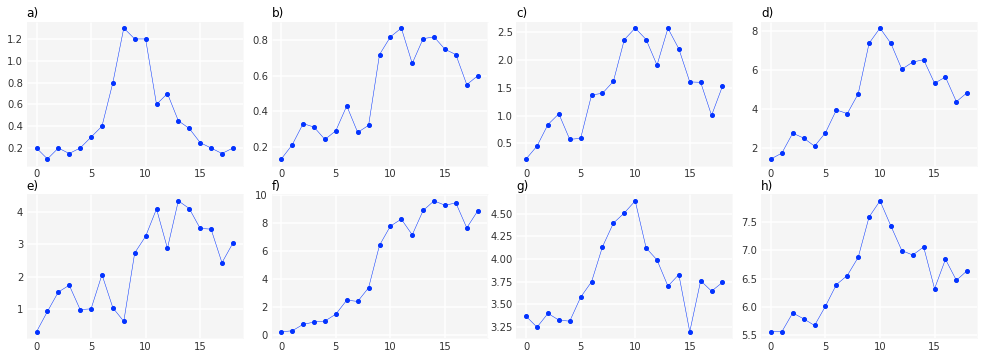

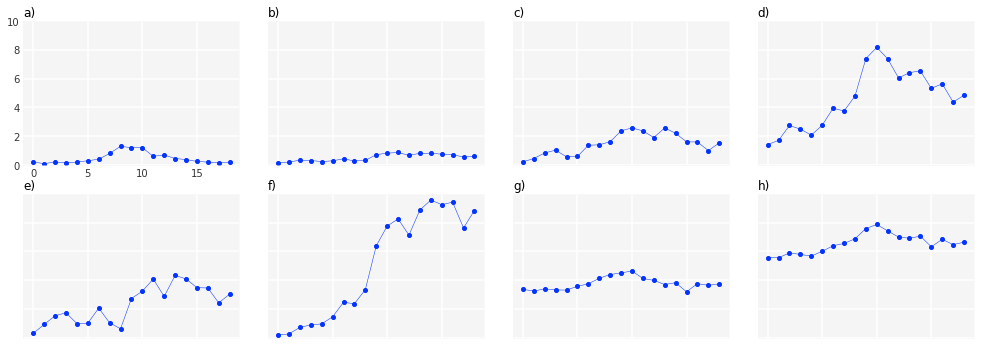

In [5]:
# plot autoscale versus fixed scale

fig=plt.figure(figsize=(10,10))

w=.3
h=.2
dh=.04
dw=.04
ncols=4

k=0
for y in [y1,y2,y3,y4,y5,y6,y7,y8]:
    r,c = divmod(k,ncols)
       
    ax = fig.add_axes([(w+dw)*c,-(h+dh)*r,w,h])
    ax.plot(x,y,'.-',c=c1,ms=8,lw=.5)
    
    ax.grid(True)
    ax.annotate(titles[k]+')',xy=(0,1.03),xycoords='axes fraction',fontsize=12)
    
    k+=1
    

fig=plt.figure(figsize=(10,10))

k=0
for y in [y1,y2,y3,y4,y5,y6,y7,y8]:
    r,c = divmod(k,ncols)
       
    ax = fig.add_axes([(w+dw)*c,-(h+dh)*r,w,h])
    ax.plot(x,y,'.-',c=c1,ms=8,lw=.5)
    
    if k>0:
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    
    ax.grid(True)
    
    #ax.set_yscale('log')
    ax.set_ylim(0,10)
    #ax.set_ylim(1e-1,1.1e1)
    ax.annotate(titles[k]+')',xy=(0,1.03),xycoords='axes fraction',fontsize=12)
    
    k+=1

# Bandlines 
### https://www.perceptualedge.com/articles/visual_business_intelligence/introducing_bandlines.pdf

In [6]:
# create bandlines with 10 band resolution in the background

In [7]:
# define colors

# total number of colors in colormap 
#n=30
n=20
#n=11

# different options
#cmap=plt.get_cmap("Reds", n)
#cmap=plt.get_cmap("summer_r", n)

cmap=plt.get_cmap("Greys", n)
#cmap=plt.get_cmap("bone_r", n)
#cmap=plt.get_cmap("turbo_r", n)
#cmap=plt.get_cmap("Oranges", n)


# create list of first 10 colors only (complete cmap maybe has too much dynamic range)
cmap_l=[cmap(n) for n in np.arange(1,11)]

In [8]:

xmax=np.max(x)+2 #just the x range 
ymax=11
rls=np.arange(0,ymax,1) #range limits 0-10

def add_patch_band(ax,ymin,ymax,c):
    '''
    add one band between ymin and ymax
    '''
    ax.add_patch(patches.Rectangle(
        (-1, ymin),   # (x,y)
        xmax,          # width
        ymax-ymin,          # height
    color=c,zorder=-1,alpha=1))#a=.4
    
def bandplot(ax,x,y):
    '''
    plot x,y with bands in the background
    '''
    ax.plot(x,y,'.-',c=(.01,.2,1),lw=.2,ms=10,zorder=5)
    ylims = ax.get_ylim()
    
    #loop over the bands
    for k in range(len(rls)-1):
        add_patch_band(ax,rls[k],rls[k+1],cmap_l[k])
    
    ax.set_yticklabels([])
    ax.set_yticks([])
    
    ax.set_ylim(.98*ylims[0],1.01*ylims[1])
   
    return ax,ylims


def bp_legend(ax):
    '''
    band plot legend (form empty bandplot)
    '''
    bandplot(ax,[],[])
    ax.set_xticklabels([])
    ax.set_ylim(0,2)
    ax.set_yticks(rls)
    ax.set_yticklabels(rls)
    ax.tick_params(labelsize=10,pad=2)
    ax.grid(False)

In [9]:
# define size / layout for small multiple plots
w=.3
h=.2
dh=.04
dw=.04
ncols=4

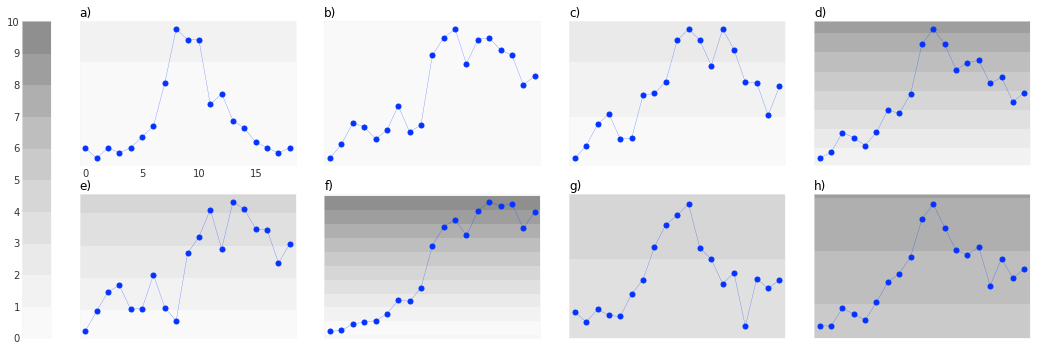

In [10]:
fig=plt.figure(figsize=(10,10))

k=0
for y in [y1,y2,y3,y4,y5,y6,y7,y8]:
    r,c = divmod(k,ncols)
       
    ax = fig.add_axes([(w+dw)*c,-(h+dh)*r,w,h])
    
    if k==0:
        ax2 = plt.axes([-2*dw,-h-dh,.04,2*h+dh])
        bp_legend(ax2)
    if k>0:
        ax.set_xticklabels('')
    
    bandplot(ax,x,y)
    
    ax.grid(False)

    ax.set_xlim(-.5,18.5)
    
    ax.annotate(titles[k]+')',xy=(0,1.03),xycoords='axes fraction',fontsize=12)
    
    k+=1
    

# Scale sliders

In [11]:
def add_patch_box2(ax,ymin,ymax):
    w=2
    ax.add_patch(patches.Rectangle(
        (-1,ymin),   # (x,y)
        w,
        ymax-ymin,  # width
                  # height
    color='.7',zorder=0,alpha=1))
    
    
def bp_scale(ax,ylims):
    '''
    make scale slider for y limits, in separate axis
    '''
    ax.set_ylim(0,10)
    ax.set_xticklabels('')
    ax.set_xlim(-1,1)
    ax.grid(axis='y')
    
    add_patch_box2(ax,ylims[0],ylims[1])

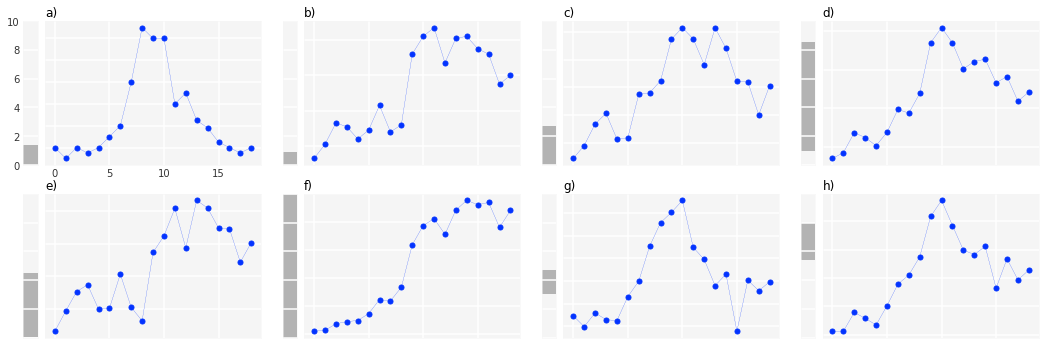

In [12]:
fig=plt.figure(figsize=(10,10))

w=.3
h=.2
dh=.04
dw=.06
ncols=4

k=0
for y in [y1,y2,y3,y4,y5,y6,y7,y8]:
    r,c = divmod(k,ncols)
       
    ax = fig.add_axes([(w+dw)*c,-(h+dh)*r,w,h])
    ax2= fig.add_axes([(w+dw)*c-dw/2,-(h+dh)*r,.02,h])
    
    ax.plot(x,y,'.-',c=(.01,.2,1),lw=.2,ms=10,zorder=5)
    ax.grid(True)
    ax.set_yticklabels('')
    if k>0:
        ax.set_xticklabels('')
        ax2.set_yticklabels('')
    ylims = ax.get_ylim()
    
    bp_scale(ax2,ylims)
    ax.annotate(titles[k]+')',xy=(0,1.03),xycoords='axes fraction',fontsize=12)
    k+=1
